In [1]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm

     |████████████████████████████████| 58.6 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [2]:
!pip install rich

In [3]:
import pandas as pd
import numpy as np
import regex as re
import spacy
nlp = spacy.load("pl_core_news_sm")
from rich import inspect

In [4]:
df_analiza = pd.read_csv("strajk.csv")

In [5]:
df_analiza

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sat Sep 18 10:36:17 +0000 2021,NaN,NaN,NaN,0,1439176442789744644,NaN,NaN,NaN,pl,NaN,NaN,NaN,8,1.439167e+18,donald_PL_,"<a href=""http://twitter.com/download/android"" ...","Przed chwilą przed Kancelarią Premiera, gdzie ...",https://twitter.com/asegPL/status/143917644278...,Sat Jun 18 13:45:28 +0000 2011,319644456,False,"Leftie, tech geek, EDM freak, PR guy. He/him. ...",164599,3289,1675,170,"Warszawa, Polska",Dyrektor TT 🏳️‍🌈,asegPL,391205,NaN,NaN,False
1,NaN,Sat Sep 18 11:43:51 +0000 2021,NaN,NaN,NaN,0,1439193449387941895,NaN,NaN,NaN,pl,NaN,NaN,NaN,15,1.438561e+18,wcalenieolga,"<a href=""http://twitter.com/download/android"" ...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/dyedlids/status/1439193449...,Wed Feb 20 13:48:56 +0000 2019,1098217945958887429,False,equality♀️\nleft-wing politics,6526,15,100,0,NaN,dyedlids⚡,dyedlids,531,NaN,NaN,False
2,NaN,Sat Sep 18 11:32:57 +0000 2021,NaN,NaN,NaN,6,1439190705285603333,acosta_re_nata,1.439181e+18,9.422560e+08,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@acosta_re_nata Co w przypadku gdy gość zrobił...,https://twitter.com/Tomasz_Ze/status/143919070...,Sun Oct 21 12:37:02 +0000 2018,1053988528663736321,False,Krakus o pasiastym sercu. Serce mam po prawej ...,46389,1020,1787,2,"Kraków, Polska",Tomasz Ż.🇵🇱✝️ #BabiesLivesMatter,Tomasz_Ze,12039,NaN,NaN,False
3,NaN,Sat Sep 18 09:06:38 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,Sat Apr 18 12:57:15 +0000 2020,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False
4,NaN,Sat Sep 18 10:38:24 +0000 2021,NaN,NaN,NaN,2,1439176975856328706,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Liderzy PO chodzili na strajk kobiet, a Tusk t...",https://twitter.com/_myszkowski/status/1439176...,Mon Dec 30 00:27:32 +0000 2019,1211443618394718211,False,Wchodzę z młotkiem na rozmowę jak pracownik w ...,13998,1138,293,0,NaN,Myszkowski,_myszkowski,16036,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,NaN,Fri Sep 10 12:46:57 +0000 2021,Medycy,NaN,https://wiadomosci.onet.pl/kraj/strajk-pracown...,0,1436310224235864074,NaN,NaN,NaN,pl,NaN,False,NaN,2,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","""#Medycy opuścili spotkanie z ministrem zdrowi...",https://twitter.com/AndrzejNowak/status/143631...,Sun Jan 31 01:19:53 +0000 2010,110006946,False,Doradzający w sprawach gospodarczych prawnik z...,352,2554,2088,224,#Warszawa,Andrzej Nowak,AndrzejNowak,185443,NaN,http://andrzejnowakradcaprawny.pl,False
4072,NaN,Fri Sep 10 11:44:28 +0000 2021,NaN,NaN,NaN,0,1436294498427052036,NaN,NaN,NaN,pl,NaN,NaN,NaN,84,1.434414e+18,Magmag77711777,"<a href=""http://twitter.com/download/android"" ...",Australia. Sydney \nTak zaczynają wyglądać mar...,https://twitter.com/skrzat341/status/143629449...,Sat Oct 10 13:49:39 +0000 2015,3918742281,True,Obserwator matrixa.,42305,107,664,1,"Grudziądz, Polska",skrzat34,skrzat341,6759,NaN,NaN,False
4073,NaN,Fri Sep 10 12:50:15 +0000 2021,NaN,NaN,NaN,0,1436311054670311424,NowyObywatel,1.436309e+18,1.060815e+08,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mo

In [6]:
import tqdm

In [7]:
#Część 1

In [8]:
#1

In [9]:
df_analiza["created_at"] = [wiersz.replace("Sat", "Sobota") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Sun", "Niedziela") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Fri", "Piątek") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Thu", "Czwartek") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Wed", "Środa") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Tue", "Wtorek") for wiersz in df_analiza["created_at"]]
df_analiza["created_at"] = [wiersz.replace("Mon", "Poniedziałek") for wiersz in df_analiza["created_at"]]

In [10]:
df_analiza

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sobota Sep 18 10:36:17 +0000 2021,NaN,NaN,NaN,0,1439176442789744644,NaN,NaN,NaN,pl,NaN,NaN,NaN,8,1.439167e+18,donald_PL_,"<a href=""http://twitter.com/download/android"" ...","Przed chwilą przed Kancelarią Premiera, gdzie ...",https://twitter.com/asegPL/status/143917644278...,Sat Jun 18 13:45:28 +0000 2011,319644456,False,"Leftie, tech geek, EDM freak, PR guy. He/him. ...",164599,3289,1675,170,"Warszawa, Polska",Dyrektor TT 🏳️‍🌈,asegPL,391205,NaN,NaN,False
1,NaN,Sobota Sep 18 11:43:51 +0000 2021,NaN,NaN,NaN,0,1439193449387941895,NaN,NaN,NaN,pl,NaN,NaN,NaN,15,1.438561e+18,wcalenieolga,"<a href=""http://twitter.com/download/android"" ...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/dyedlids/status/1439193449...,Wed Feb 20 13:48:56 +0000 2019,1098217945958887429,False,equality♀️\nleft-wing politics,6526,15,100,0,NaN,dyedlids⚡,dyedlids,531,NaN,NaN,False
2,NaN,Sobota Sep 18 11:32:57 +0000 2021,NaN,NaN,NaN,6,1439190705285603333,acosta_re_nata,1.439181e+18,9.422560e+08,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@acosta_re_nata Co w przypadku gdy gość zrobił...,https://twitter.com/Tomasz_Ze/status/143919070...,Sun Oct 21 12:37:02 +0000 2018,1053988528663736321,False,Krakus o pasiastym sercu. Serce mam po prawej ...,46389,1020,1787,2,"Kraków, Polska",Tomasz Ż.🇵🇱✝️ #BabiesLivesMatter,Tomasz_Ze,12039,NaN,NaN,False
3,NaN,Sobota Sep 18 09:06:38 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,Sat Apr 18 12:57:15 +0000 2020,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False
4,NaN,Sobota Sep 18 10:38:24 +0000 2021,NaN,NaN,NaN,2,1439176975856328706,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Liderzy PO chodzili na strajk kobiet, a Tusk t...",https://twitter.com/_myszkowski/status/1439176...,Mon Dec 30 00:27:32 +0000 2019,1211443618394718211,False,Wchodzę z młotkiem na rozmowę jak pracownik w ...,13998,1138,293,0,NaN,Myszkowski,_myszkowski,16036,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,NaN,Piątek Sep 10 12:46:57 +0000 2021,Medycy,NaN,https://wiadomosci.onet.pl/kraj/strajk-pracown...,0,1436310224235864074,NaN,NaN,NaN,pl,NaN,False,NaN,2,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","""#Medycy opuścili spotkanie z ministrem zdrowi...",https://twitter.com/AndrzejNowak/status/143631...,Sun Jan 31 01:19:53 +0000 2010,110006946,False,Doradzający w sprawach gospodarczych prawnik z...,352,2554,2088,224,#Warszawa,Andrzej Nowak,AndrzejNowak,185443,NaN,http://andrzejnowakradcaprawny.pl,False
4072,NaN,Piątek Sep 10 11:44:28 +0000 2021,NaN,NaN,NaN,0,1436294498427052036,NaN,NaN,NaN,pl,NaN,NaN,NaN,84,1.434414e+18,Magmag77711777,"<a href=""http://twitter.com/download/android"" ...",Australia. Sydney \nTak zaczynają wyglądać mar...,https://twitter.com/skrzat341/status/143629449...,Sat Oct 10 13:49:39 +0000 2015,3918742281,True,Obserwator matrixa.,42305,107,664,1,"Grudziądz, Polska",skrzat34,skrzat341,6759,NaN,NaN,False
4073,NaN,Piątek Sep 10 12:50:15 +0000 2021,NaN,NaN,NaN,0,1436311054670311424,NowyObywatel,1.436309e+18,1.060815e+08,pl,NaN,NaN,NaN,0,NaN,N

In [ ]:
#2

In [16]:
df_analiza["user_created_at"] = pd.to_datetime(df_analiza["user_created_at"])

In [17]:
df_analiza

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sobota Sep 18 10:36:17 +0000 2021,NaN,NaN,NaN,0,1439176442789744644,NaN,NaN,NaN,pl,NaN,NaN,NaN,8,1.439167e+18,donald_PL_,"<a href=""http://twitter.com/download/android"" ...","Przed chwilą przed Kancelarią Premiera, gdzie ...",https://twitter.com/asegPL/status/143917644278...,2011-06-18 13:45:28+00:00,319644456,False,"Leftie, tech geek, EDM freak, PR guy. He/him. ...",164599,3289,1675,170,"Warszawa, Polska",Dyrektor TT 🏳️‍🌈,asegPL,391205,NaN,NaN,False
1,NaN,Sobota Sep 18 11:43:51 +0000 2021,NaN,NaN,NaN,0,1439193449387941895,NaN,NaN,NaN,pl,NaN,NaN,NaN,15,1.438561e+18,wcalenieolga,"<a href=""http://twitter.com/download/android"" ...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/dyedlids/status/1439193449...,2019-02-20 13:48:56+00:00,1098217945958887429,False,equality♀️\nleft-wing politics,6526,15,100,0,NaN,dyedlids⚡,dyedlids,531,NaN,NaN,False
2,NaN,Sobota Sep 18 11:32:57 +0000 2021,NaN,NaN,NaN,6,1439190705285603333,acosta_re_nata,1.439181e+18,9.422560e+08,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@acosta_re_nata Co w przypadku gdy gość zrobił...,https://twitter.com/Tomasz_Ze/status/143919070...,2018-10-21 12:37:02+00:00,1053988528663736321,False,Krakus o pasiastym sercu. Serce mam po prawej ...,46389,1020,1787,2,"Kraków, Polska",Tomasz Ż.🇵🇱✝️ #BabiesLivesMatter,Tomasz_Ze,12039,NaN,NaN,False
3,NaN,Sobota Sep 18 09:06:38 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,2020-04-18 12:57:15+00:00,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False
4,NaN,Sobota Sep 18 10:38:24 +0000 2021,NaN,NaN,NaN,2,1439176975856328706,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Liderzy PO chodzili na strajk kobiet, a Tusk t...",https://twitter.com/_myszkowski/status/1439176...,2019-12-30 00:27:32+00:00,1211443618394718211,False,Wchodzę z młotkiem na rozmowę jak pracownik w ...,13998,1138,293,0,NaN,Myszkowski,_myszkowski,16036,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,NaN,Piątek Sep 10 12:46:57 +0000 2021,Medycy,NaN,https://wiadomosci.onet.pl/kraj/strajk-pracown...,0,1436310224235864074,NaN,NaN,NaN,pl,NaN,False,NaN,2,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","""#Medycy opuścili spotkanie z ministrem zdrowi...",https://twitter.com/AndrzejNowak/status/143631...,2010-01-31 01:19:53+00:00,110006946,False,Doradzający w sprawach gospodarczych prawnik z...,352,2554,2088,224,#Warszawa,Andrzej Nowak,AndrzejNowak,185443,NaN,http://andrzejnowakradcaprawny.pl,False
4072,NaN,Piątek Sep 10 11:44:28 +0000 2021,NaN,NaN,NaN,0,1436294498427052036,NaN,NaN,NaN,pl,NaN,NaN,NaN,84,1.434414e+18,Magmag77711777,"<a href=""http://twitter.com/download/android"" ...",Australia. Sydney \nTak zaczynają wyglądać mar...,https://twitter.com/skrzat341/status/143629449...,2015-10-10 13:49:39+00:00,3918742281,True,Obserwator matrixa.,42305,107,664,1,"Grudziądz, Polska",skrzat34,skrzat341,6759,NaN,NaN,False
4073,NaN,Piątek Sep 10 12:50:15 +0000 2021,NaN,NaN,NaN,0,1436311054670311424,NowyObywatel,1.436309e+18,1.060815e+08,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitte

In [ ]:
#3

In [39]:
tweety_lista = df_analiza["tweet_url"].tolist() 

In [40]:
tweety_lista

['https://twitter.com/asegPL/status/1439176442789744644',
 'https://twitter.com/dyedlids/status/1439193449387941895',
 'https://twitter.com/Tomasz_Ze/status/1439190705285603333',
 'https://twitter.com/Bodziahna/status/1439153882177888259',
 'https://twitter.com/_myszkowski/status/1439176975856328706',
 'https://twitter.com/agraffka2/status/1439212266855993346',
 'https://twitter.com/10mona17/status/1439175580713426949',
 'https://twitter.com/marikwiatkowska/status/1439165223924027398',
 'https://twitter.com/okedar2/status/1439159365332873221',
 'https://twitter.com/KominiarzEU/status/1439148632670982145',
 'https://twitter.com/Andrzej19482/status/1439177999283261444',
 'https://twitter.com/Hugo210012/status/1439212125558382595',
 'https://twitter.com/Lendzian_/status/1439216015242665990',
 'https://twitter.com/Katarzynak23/status/1439212925777027072',
 'https://twitter.com/Ewa75023657/status/1439199795596386305',
 'https://twitter.com/Bogda62712791/status/1439153886342926338',
 'https:

In [ ]:
#4

In [41]:
tweety_lista1 = df_analiza["urls"].tolist() 

In [42]:
tweety_lista1

[nan,
 nan,
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 nan,
 nan,
 nan,
 'https://twitter.com/radkul86/status/1438948228297371661',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 nan,
 nan,
 nan,
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://twitter.com/RMF24pl/status/1439187415906803712',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 nan,
 nan,
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zl

In [43]:
tweety_lista1_new = [item for item in tweety_lista1 if not(pd.isnull(item)) == True]

In [44]:
tweety_lista1_new

['https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://twitter.com/radkul86/status/1438948228297371661',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://twitter.com/RMF24pl/status/1439187415906803712',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-nemo/medyka-za-75-zlgodz-wynajme-na-strajk',
 'https://twitter.com/synxchaosu/status/1439200391183355905',
 'https://niepoprawni.pl/niepoprawni2/blog/kapitan-

In [ ]:
#5

In [45]:
tweety_obrazki = df_analiza["media"].tolist() 

In [46]:
tweety_obrazki

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/Hugo210012/status/1439212125558382595/photo/1',
 'https://twitter.com/ronfox102/status/1439208978320330755/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/AdamKAS7/status/1439198708629975045/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/donald_PL_/status/1439167277434347520/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/92_pjoter/status/1439161597826568193/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/ronfox102/status/1439208978320330755/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 na

In [47]:
tweety_obrazki_new = [item for item in tweety_obrazki if not(pd.isnull(item)) == True]

In [48]:
tweety_obrazki_new

['https://twitter.com/Hugo210012/status/1439212125558382595/photo/1',
 'https://twitter.com/ronfox102/status/1439208978320330755/photo/1',
 'https://twitter.com/AdamKAS7/status/1439198708629975045/photo/1',
 'https://twitter.com/donald_PL_/status/1439167277434347520/photo/1',
 'https://twitter.com/92_pjoter/status/1439161597826568193/photo/1',
 'https://twitter.com/ronfox102/status/1439208978320330755/photo/1',
 'https://twitter.com/JoasiaDorotka/status/1439134905292709890/photo/1',
 'https://twitter.com/irach_kuba/status/1439112060877557761/photo/1',
 'https://twitter.com/KOMO26133610/status/1438943227634126848/photo/1',
 'https://twitter.com/Gapgrupawawa/status/1439114102954156035/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1438773499699417088/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1438773499699417088/photo/1',
 'https://twitter.com/Wika80829132/status/1438747257428496384/photo/1',
 'https://twitter.com/MichalGrzywa/status/1438553193835864064/photo/1',
 'http

In [ ]:
#6 

In [196]:
sp = spacy.load('pl_core_news_sm')

all_stopwords = sp.Defaults.stop_words

df_analiza['text_without_stopwords'] = df_analiza['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [198]:
df_analiza[['text_without_stopwords','text']]

,text_without_stopwords,text
0,"Przed chwilą Kancelarią Premiera, trwa Strajk ...","Przed chwilą przed Kancelarią Premiera, gdzie ..."
1,„medycy wybrali strajk ROSNĄCEJ LICZBY ZAKAŻEŃ...,„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...
2,@acosta_re_nata Co przypadku gość zrobił despe...,@acosta_re_nata Co w przypadku gdy gość zrobił...
3,MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK! https:...,MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...
4,"Liderzy PO chodzili strajk kobiet, Tusk mówi, ...","Liderzy PO chodzili na strajk kobiet, a Tusk t..."
...,...,...
4071,"""#Medycy opuścili spotkanie ministrem zdrowia""...","""#Medycy opuścili spotkanie z ministrem zdrowi..."
4072,Australia. Sydney Tak zaczynają wyglądać marke...,Australia. Sydney \nTak zaczynają wyglądać mar...
4073,@NowyObywatel @GralaArtur rynek wycenia nieste...,@NowyObywatel @GralaArtur no rynek mnie tak ni...
4074,Medycy opuścili spotkanie ministrem zdrowia ht...,Medycy opuścili spotkanie z ministrem zdrowia ...


In [ ]:
#Część 2

In [49]:
#1.
df_analiza.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sobota Sep 18 10:36:17 +0000 2021,NaN,NaN,NaN,0,1439176442789744644,NaN,NaN,NaN,pl,NaN,NaN,NaN,8,1.439167e+18,donald_PL_,"<a href=""http://twitter.com/download/android"" ...","Przed chwilą przed Kancelarią Premiera, gdzie ...",https://twitter.com/asegPL/status/143917644278...,2011-06-18 13:45:28+00:00,319644456,False,"Leftie, tech geek, EDM freak, PR guy. He/him. ...",164599,3289,1675,170,"Warszawa, Polska",Dyrektor TT 🏳️‍🌈,asegPL,391205,NaN,NaN,False
1,NaN,Sobota Sep 18 11:43:51 +0000 2021,NaN,NaN,NaN,0,1439193449387941895,NaN,NaN,NaN,pl,NaN,NaN,NaN,15,1.438561e+18,wcalenieolga,"<a href=""http://twitter.com/download/android"" ...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/dyedlids/status/1439193449...,2019-02-20 13:48:56+00:00,1098217945958887429,False,equality♀️\nleft-wing politics,6526,15,100,0,NaN,dyedlids⚡,dyedlids,531,NaN,NaN,False
2,NaN,Sobota Sep 18 11:32:57 +0000 2021,NaN,NaN,NaN,6,1439190705285603333,acosta_re_nata,1.439181e+18,942255950.0,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@acosta_re_nata Co w przypadku gdy gość zrobił...,https://twitter.com/Tomasz_Ze/status/143919070...,2018-10-21 12:37:02+00:00,1053988528663736321,False,Krakus o pasiastym sercu. Serce mam po prawej ...,46389,1020,1787,2,"Kraków, Polska",Tomasz Ż.🇵🇱✝️ #BabiesLivesMatter,Tomasz_Ze,12039,NaN,NaN,False
3,NaN,Sobota Sep 18 09:06:38 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,2020-04-18 12:57:15+00:00,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False
4,NaN,Sobota Sep 18 10:38:24 +0000 2021,NaN,NaN,NaN,2,1439176975856328706,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Liderzy PO chodzili na strajk kobiet, a Tusk t...",https://twitter.com/_myszkowski/status/1439176...,2019-12-30 00:27:32+00:00,1211443618394718211,False,Wchodzę z młotkiem na rozmowę jak pracownik w ...,13998,1138,293,0,NaN,Myszkowski,_myszkowski,16036,NaN,NaN,False


In [50]:
df_analiza_lajki = df_analiza

In [55]:
df_analiza_lajki.sort_values(by = 'favorite_count', ascending = 0).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
3690,NaN,Sobota Sep 11 10:51:08 +0000 2021,NaN,NaN,NaN,1582,1436643467992645634,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/Jowita_W/status/1436643467...,2017-04-13 19:09:46+00:00,852599711127269376,False,ciemnogród ;-)🇵🇱,226862,20974,2864,29,Polska,Jowita💯❤🇵🇱#MuremZaPolskimMundurem,Jowita_W,79404,NaN,NaN,False
2619,NaN,Niedziela Sep 12 08:18:21 +0000 2021,ProtestMedykow,NaN,NaN,931,1436967403158753280,NaN,NaN,NaN,pl,NaN,NaN,NaN,220,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","Chcecie organizować strajk, po tym jak dostali...",https://twitter.com/tebaranowski/status/143696...,2020-07-20 06:40:27+00:00,1285102216177766401,False,"Katolik, mąż, ojciec, popularyzator Linuksa, s...",81456,1223,629,9,"Leszno, Polska",Atomowy Niedźwiedź Baranowski #wielkochłopizm,tebaranowski,26061,NaN,NaN,False
3221,NaN,Sobota Sep 11 17:13:15 +0000 2021,NaN,NaN,NaN,817,1436739629185708035,NaN,NaN,NaN,pl,NaN,NaN,NaN,122,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wszyscy hejtujacych strajk medyków: morfologie...,https://twitter.com/pasjeniobe/status/14367396...,2017-01-06 15:45:26+00:00,817396664960950272,False,🇪🇺🇵🇱 Sojuszniczka #LGBT🏳️‍🌈feministka ♀️ jogin...,42951,2946,1728,4,Częstochowa,🅰️nn cnota niewiescia 🍑,pasjeniobe,36314,NaN,NaN,False
3571,NaN,Sobota Sep 11 12:14:37 +0000 2021,NaN,NaN,NaN,637,1436664474342207488,NaN,NaN,NaN,pl,NaN,NaN,NaN,267,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Na czele „strajku medyków” stoi kobieta, która...",https://twitter.com/m_bielecki_/status/1436664...,2018-01-11 20:49:54+00:00,951556796120031233,False,"Kryminologia, Prawo, Polityka, Social Media \n...",31182,10928,3016,13,"Warszawa / Kielce, Polska",Marcel Bielecki🇵🇱,m_bielecki_,8817,NaN,https://www.facebook.com/MBieleckiPL,False
336,NaN,Czwartek Sep 16 17:52:05 +0000 2021,NaN,NaN,NaN,608,1438561339455295488,wcalenieolga,1.438561e+18,2.330973e+09,pl,NaN,NaN,NaN,15,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/wcalenieolga/status/143856...,2014-02-06 23:10:30+00:00,2330973296,False,lekarka ginekolożka in spe | feministka | pro ...,1565,1012,139,5,"Poznan, Poland",Olga,wcalenieolga,1316,NaN,NaN,False


In [ ]:
#2.

In [56]:
df_analiza_retweety = df_analiza

In [57]:
df_analiza_retweety.sort_values(by = 'retweet_count', ascending = 0).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
2929,NaN,Sobota Sep 11 20:50:55 +0000 2021,NaN,NaN,NaN,0,1436794404514172929,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,1.436643e+18,Jowita_W,"<a href=""http://twitter.com/download/android"" ...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/wchmiel1958/status/1436794...,2018-06-26 00:13:25+00:00,1011402014385999873,False,NaN,48910,757,1479,2,NaN,Wchmiel1958,wchmiel1958,72186,NaN,NaN,False
3412,NaN,Sobota Sep 11 15:11:42 +0000 2021,NaN,NaN,NaN,0,1436709039677788162,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,1.436643e+18,Jowita_W,"<a href=""http://twitter.com/download/android"" ...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/AntoniKowalsk17/status/143...,2018-02-10 08:15:16+00:00,962238524790657024,False,Zwykły szary człowiek który przepracował dla O...,46572,5266,4725,3,Polska,Antoni Kowalski.PL💯.🇵🇱,AntoniKowalsk17,51456,NaN,NaN,False
2480,NaN,Niedziela Sep 12 11:56:23 +0000 2021,NaN,NaN,NaN,0,1437022273228218372,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,1.436643e+18,Jowita_W,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/antytusk1/status/143702227...,2021-04-24 21:28:57+00:00,1386069522348756999,False,"Konto nr 2.\nŚlusarz-spawacz z Pomorza ""norma...",7450,576,683,11,NaN,ANTYtusk2,antytusk1,15227,NaN,NaN,False
2481,NaN,Niedziela Sep 12 11:17:15 +0000 2021,NaN,NaN,NaN,0,1437012427581841415,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,1.436643e+18,Jowita_W,"<a href=""http://twitter.com/download/android"" ...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/LusiaPusia2/status/1437012...,2017-07-22 14:02:06+00:00,888761071980486657,False,"Wesoła, czasem irytująca, nie lubię obłudy i o...",80813,656,1664,0,"Podkarpackie, Polska",Lusia Pusia #BabiesLivesMatter,LusiaPusia2,14203,NaN,NaN,False
1757,NaN,Poniedziałek Sep 13 09:03:22 +0000 2021,NaN,NaN,NaN,0,1437341119860428804,NaN,NaN,NaN,pl,NaN,NaN,NaN,435,1.436643e+18,Jowita_W,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Strajk medyków uważam za niemoralny i karygodn...,https://twitter.com/KMetaKowalski/status/14373...,2014-02-22 17:12:30+00:00,2356642926,False,"Piłsudczyk, już nie radykał ale buntownik. PiS...",219474,5170,3804,61,NaN,Ksawery MetaKowalski,KMetaKowalski,217877,NaN,NaN,False


In [57]:
#3.

In [58]:
df_analiza_wrażliwe = df_analiza

In [63]:
df_analiza_wrażliwe[df_analiza_wrażliwe['possibly_sensitive'] == False]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
3,NaN,Sobota Sep 18 09:06:38 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,2020-04-18 12:57:15+00:00,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False
9,NaN,Sobota Sep 18 08:45:46 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439148632670982145,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/KominiarzEU/status/1439148...,2014-11-03 21:20:14+00:00,2888946644,False,Prof. Legutko: antykaczyzm jest najbardziej od...,221597,6893,6507,13,Polska,KominiarzEuropejski,KominiarzEU,122704,NaN,NaN,False
10,NaN,Sobota Sep 18 10:42:28 +0000 2021,NaN,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439177999283261444,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Andrzej19482/status/143917...,2019-05-19 20:36:36+00:00,1130210670715310080,False,NaN,63369,2239,2216,1,NaN,Andrzej1948,Andrzej19482,14262,NaN,NaN,False
11,NaN,Sobota Sep 18 12:58:04 +0000 2021,NaN,https://twitter.com/Hugo210012/status/14392121...,NaN,5,1439212125558382595,Maximus13305555,1.439137e+18,1.273634e+18,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@Maximus13305555 Hahaha 😂\nParadoks sytuacji p...,https://twitter.com/Hugo210012/status/14392121...,2020-08-08 09:54:53+00:00,1292036504131379202,False,"Montfermeil, Varsovie 🇵🇱🇪🇺",17948,173,218,0,"Warszawa, Polska",Hugocopter,Hugo210012,5461,NaN,NaN,False
12,NaN,Sobota Sep 18 13:13:32 +0000 2021,NaN,https://twitter.com/ronfox102/status/143920897...,NaN,0,1439216015242665990,NaN,NaN,NaN,pl,NaN,False,NaN,1,1.439209e+18,ronfox102,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Panowie medycy czy to prawda ,strajk strajkiem...",https://twitter.com/Lendzian_/status/143921601...,2012-01-22 20:15:49+00:00,471390417,False,Zawsze była i będzie prawa strona. Żadna Konfa...,877,830,1110,0,Polska Śląsk,Lendzian - imię moje to Polska. #Polska ***** **,Lendzian_,2242,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,NaN,Piątek Sep 10 12:49:49 +0000 2021,NaN,NaN,https://wiadomosci.onet.pl/kraj/strajk-pracown...,1,1436310945178038272,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Buta i bezczelność władzy PIS nie zna granic...,https://twitter.com/Wojciech_57/status/1436310...,2020-06-12 17:25:34+00:00,1271493777560145920,False,Sarkastyczno-ironiczny szyderca. Wielbiciel si...,9170,1283,2610,4,Polska,APOCALIPSUS 👊,Wojciech_57,11817,NaN,NaN,False
4068,NaN,Piątek Sep 10 11:50:27 +0000 2021,NaN,NaN,https://twitter.com/DoRzeczy_pl/status/1436237...,1,1436296006702936078,NaN,NaN,NaN,pl,"Harrow, London",False,1.436238e+18,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Ktoś tu się prosi o strajk studentòw faszysta ...,https://twitter.com/RadioOpornik/status/143629...,2015-11-16 12:37:02+00:00,4201714659,False,"Niezależne Radio Internetowe , głos wolnych lu...",106620,6365,2260,30,

In [ ]:
#4.

In [64]:
df_analiza_konto_najwcześniej = df_analiza

In [70]:
df_najstarszy = df_analiza_konto_najwcześniej.sort_values(by = 'user_created_at').head(1)

In [92]:
id_najstarszy = df_najstarszy['user_id'].values.tolist()


In [98]:
df_analiza_konto_najwcześniej[df_analiza_konto_najwcześniej['user_id'] == id_najstarszy [0]]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
498,NaN,Czwartek Sep 16 08:14:39 +0000 2021,NaN,NaN,NaN,0,1438416024517464068,NaN,NaN,NaN,pl,NaN,NaN,NaN,7,1.438393e+18,konsul_geoffrey,"<a href=""http://twitter.com/download/android"" ...","Popieram strajk medyków, ale uważam, że powinn...",https://twitter.com/Hazardius/status/143841602...,2007-09-22 18:01:31+00:00,9035752,False,31🇬🇱 @ 🇳🇴Bergen - 🏳️‍🌈🍳ASD\nC♯🎶/Ruby♦️/Python🐍...,98621,380,1341,3,"Bergen, Norge",Hazardius 🡗🡗🡗,Hazardius,28444,NaN,NaN,False


In [ ]:
#5.

In [116]:
df_analiza_najwięcejfollow = df_analiza

In [117]:
df_najwięcejfollow = df_analiza_najwięcejfollow.sort_values(by = 'user_followers_count', ascending = 0).head(1)

In [118]:
id_najwięcejfollow = df_najwięcejfollow['user_followers_count'].values.tolist()

In [119]:
df_analiza_najwięcejfollow[df_analiza_najwięcejfollow['user_followers_count'] == id_najwięcejfollow [0]]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
3997,NaN,Piątek Sep 10 15:00:12 +0000 2021,NaN,NaN,https://tvn24.pl/polska/protest-pracownikow-oc...,30,1436343756802904065,NaN,NaN,NaN,pl,NaN,False,NaN,8,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",[AKTUALIZACJA] | Strajk medyków nie zostanie o...,https://twitter.com/tvn24/status/1436343756802...,2008-04-23 13:12:25+00:00,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1549315,68,1922,Poland,tvn24,tvn24,324583,NaN,http://www.tvn24.pl,True


In [ ]:
#6.

In [110]:
df_analiza_zweryfikowani = df_analiza

In [120]:
df_userzy = df_analiza_zweryfikowani[df_analiza_zweryfikowani['user_verified'] == True]

In [149]:
df_bezduplikatow = df_userzy.groupby(['user_name'], as_index=False).mean()

In [150]:
df_bezduplikatow['user_name']

0          Bartosz T. Wieliński 🇵🇱💯
1        Business Insider Polska 🇵🇱
2                         Fakty TVN
3                         Forsal.pl
4                Gazeta Wyborcza.pl
5                   Janina Ochojska
6     Martin/Marcin Mycielski 🌍🇪🇺🇵🇱
7                      Michał Gutka
8                     Polskie Radio
9                      Radio TOK FM
10                   Radio ZET NEWS
11                     TVN Warszawa
12                            tvn24
13                      tvp.info 🇵🇱
Name: user_name, dtype: object

In [ ]:
#7.

In [166]:
df_dnitygodnia = df_analiza

In [178]:
df_dnitygodnia["created_at"] = [wiersz.replace("Sobota", "Sat") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Niedziela", "Sun") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Piątek", "Fri") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Czwartek", "Thu") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Środa", "Wed") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Wtorek", "Tue") for wiersz in df_dnitygodnia["created_at"]]
df_dnitygodnia["created_at"] = [wiersz.replace("Poniedziałek", "Mon") for wiersz in df_dnitygodnia["created_at"]]

In [182]:
df_dnitygodnia['created_at'] = df_dnitygodnia['created_at'].str[:3]


In [184]:
df_dnitygodnia["created_at"].value_counts().head(1)

Sat    1186
Name: created_at, dtype: int64

In [ ]:
#najwięcej tweetów opublikowanych w sobotę

In [ ]:
#Część 3

In [ ]:
#1.

In [188]:
def osoby(text):
  doc = nlp(text)
  ents = doc.ents
  return ' '.join([ent.text for ent in ents if ent.label_ == "persName"])

df_analiza["persons"] = df_analiza["text"].apply(osoby)

In [ ]:
#2.

In [189]:
def miejsca (text):
  doc = nlp(text)
  ents = doc.ents
  return ' '.join([ent.text for ent in ents if ent.label_ == "placeName"])

df_analiza["places"] = df_analiza["text"].apply(miejsca)

In [ ]:
#3.

In [190]:
def organizacje (text):
  doc = nlp(text)
  ents = doc.ents
  return ' '.join([ent.text for ent in ents if ent.label_ == "orgName"])

df_analiza["organizations"] = df_analiza["text"].apply(organizacje)

In [ ]:
#4.

In [197]:
nlp_blank = spacy.blank("pl")
ruler = nlp_blank.add_pipe("entity_ruler")

pattern = "\S+"
patterns = [{"label": "HASHTAG", "pattern": [{"ORTH": "#"}, {"TEXT": {"REGEX": pattern}}]}]

ruler.add_patterns(patterns)

def hashtag(tekst):
  doc = nlp_blank(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "HASHTAG":
      result += ent.text + " "
  return result

df_analiza["hashtags"] = df_analiza["text"].apply(hashtag)

df_analiza

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places,organizations,text_without_stopwords
0,NaN,Sat,,NaN,NaN,0,1439176442789744644,NaN,NaN,NaN,pl,NaN,NaN,NaN,8,1.439167e+18,donald_PL_,"<a href=""http://twitter.com/download/android"" ...","Przed chwilą przed Kancelarią Premiera, gdzie ...",https://twitter.com/asegPL/status/143917644278...,2011-06-18 13:45:28+00:00,319644456,False,"Leftie, tech geek, EDM freak, PR guy. He/him. ...",164599,3289,1675,170,"Warszawa, Polska",Dyrektor TT 🏳️‍🌈,asegPL,391205,NaN,NaN,False,Kancelarią Premiera Strajk Medyków,,,"Przed chwilą Kancelarią Premiera, trwa Strajk ..."
1,NaN,Sat,,NaN,NaN,0,1439193449387941895,NaN,NaN,NaN,pl,NaN,NaN,NaN,15,1.438561e+18,wcalenieolga,"<a href=""http://twitter.com/download/android"" ...",„medycy wybrali strajk mimo ROSNĄCEJ LICZBY ZA...,https://twitter.com/dyedlids/status/1439193449...,2019-02-20 13:48:56+00:00,1098217945958887429,False,equality♀️\nleft-wing politics,6526,15,100,0,NaN,dyedlids⚡,dyedlids,531,NaN,NaN,False,,,,„medycy wybrali strajk ROSNĄCEJ LICZBY ZAKAŻEŃ...
2,NaN,Sat,,NaN,NaN,6,1439190705285603333,acosta_re_nata,1.439181e+18,9.422560e+08,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@acosta_re_nata Co w przypadku gdy gość zrobił...,https://twitter.com/Tomasz_Ze/status/143919070...,2018-10-21 12:37:02+00:00,1053988528663736321,False,Krakus o pasiastym sercu. Serce mam po prawej ...,46389,1020,1787,2,"Kraków, Polska",Tomasz Ż.🇵🇱✝️ #BabiesLivesMatter,Tomasz_Ze,12039,NaN,NaN,False,,,,@acosta_re_nata Co przypadku gość zrobił despe...
3,NaN,Sat,,NaN,https://niepoprawni.pl/niepoprawni2/blog/kapit...,0,1439153882177888259,NaN,NaN,NaN,pl,NaN,False,NaN,53,1.439119e+18,JacekJustyn,"<a href=""http://twitter.com/download/android"" ...",MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK!\nhttps...,https://twitter.com/Bodziahna/status/143915388...,2020-04-18 12:57:15+00:00,1251494902233534464,True,NaN,33224,238,725,0,NaN,Bogumiła,Bodziahna,11340,NaN,NaN,False,,,,MEDYKA ZA 75 ZŁ/GODZ WYNAJMĘ NA STRAJK! https:...
4,NaN,Sat,,NaN,NaN,2,1439176975856328706,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Liderzy PO chodzili na strajk kobiet, a Tusk t...",https://twitter.com/_myszkowski/status/1439176...,2019-12-30 00:27:32+00:00,1211443618394718211,False,Wchodzę z młotkiem na rozmowę jak pracownik w ...,13998,1138,293,0,NaN,Myszkowski,_myszkowski,16036,NaN,NaN,False,Tusk,Płońsku,PO,"Liderzy PO chodzili strajk kobiet, Tusk mówi, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,NaN,Fri,#Medycy,NaN,https://wiadomosci.onet.pl/kraj/strajk-pracown...,0,1436310224235864074,NaN,NaN,NaN,pl,NaN,False,NaN,2,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","""#Medycy opuścili spotkanie z ministrem zdrowi...",https://twitter.com/AndrzejNowak/status/143631...,2010-01-31 01:19:53+00:00,110006946,False,Doradzający w sprawach gospodarczych prawnik z...,352,2554,2088,224,#Warszawa,Andrzej Nowak,AndrzejNowak,185443,NaN,http://andrzejnowakradcaprawny.pl,False,,,,"""#Medycy opuścili spotkanie ministrem zdrowia""..."
4072,NaN,Fri,,NaN,NaN,0,1436294498427052036,NaN,NaN,NaN,pl,NaN,NaN,NaN,84,1.434414e+18,Magmag77711777,"<a href=""http://twitter.com/download/android"" ...",Australia. Sydney \nTak zaczynają wyglądać mar...,https://twitter.com/skrzat341/status/143629449...,2015-10-10 13:49:39+00:00,3918742281,True,Obserwator matrixa.,42305,107,664,1,"Grudziądz, Polsk

In [ ]:
#Część 4

In [199]:
import matplotlib.pyplot as plt

In [220]:
import pylab

In [236]:
value_counts = df_dnitygodnia["created_at"].value_counts()

df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['X', 'Y'] 
df_value_counts


,X,Y
0,Sat,1186
1,Sun,904
2,Mon,801
3,Fri,332
4,Tue,315
5,Wed,291
6,Thu,247


In [246]:
zmienna_X = df_value_counts["X"]
zmienna_Y = df_value_counts["Y"]

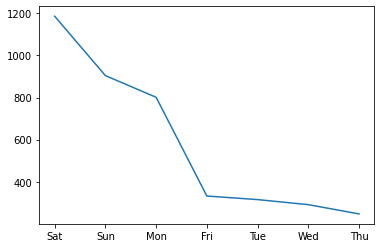

In [247]:
x = zmienna_X
y = zmienna_Y
pylab.plot(x,y)
pylab.show()